

---
### Chargmenet et Verification des images
Charger les images du dataset et vérifier leurs extensions (jpeg, jpg, bmp, png). Supprimer celles qui ne correspondent pas.


In [2]:
data_path = "data/data_blood_cell_cancer/" 


In [3]:
import os 

# data path

data_path = "data/data_blood_cell_cancer/" 

folders = os.listdir(data_path)

invalid_files  = []
classesWithoutExt  = {}

filescounter =0

allowed_extensions = [".jpeg", ".jpg", ".bmp", ".png"]

for folder in folders:
    folder_path = os.path.join(data_path, folder)

    # Skip if not a directory
    if not os.path.isdir(folder_path):
        continue

    classesWithoutExt[folder]=0

    for file in os.listdir(folder_path):

        file_path = os.path.join(folder_path, file)
        name,ext = os.path.splitext(file)

        filescounter+=1

        try:
            if ext.lower() == "" or ext.lower() not in allowed_extensions:
                classesWithoutExt[folder]+=1
                invalid_files.append(file)
                
                print(f"Deleting file without extension: {file_path}")

                # data/folder/image
                # os.remove(file_path)
        except FileNotFoundError:
            print(f"Fichier introuvable : {file_path}")
        except Exception as e:
            print(f"Erreur inattendue avec {file_path}: {e}")



print("total fils: ",filescounter)
print("files withiut extention ",len(invalid_files)) 
print(classesWithoutExt) 



total fils:  3242
files withiut extention  0
{'Benign': 0, 'early Pre-B': 0, 'Pre-B': 0, 'Pro-B': 0}


---
images and lables extracting

In [4]:
import random
import cv2
import numpy as np

# folder path
data_path = "data/data_blood_cell_cancer/" 
folders = os.listdir(data_path)

images = []
labels = []

for folder in folders:

    folder_path = os.path.join(data_path, folder)
    if not os.path.isdir(folder_path):
        continue

    for file in os.listdir(folder_path):

        file_path = os.path.join(folder_path, file)

        try:
            # read images as color (BGR) and convert to RGB
            image = cv2.imread(file_path, cv2.IMREAD_COLOR)  # returns (H, W, 3) in BGR

            # Check if image was loaded successfully
            if image is None:
                print(f"Warning: Could not load image {file_path}")
                continue

            # convert BGR to RGB
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # resize to 224x224
            image = cv2.resize(image, (224, 224))

            # RGB images already have channel dimension (224, 224, 3)
            images.append(image)
            labels.append(folder)  # folder name is the label name

        except Exception as e:
            print(f"Error processing {file_path}: {e}")
            continue

# -------------------------------------

# shuffling
combined = list(zip(images, labels))
random.shuffle(combined)
images, labels = zip(*combined)  # unzip back to separate lists

# Convert to list (zip returns tuples)
images = list(images)
labels = list(labels)

# Convert to numpy array
images = np.array(images)
labels = np.array(labels)

# summary
print(f"Total images: {len(images)}")
print(f"Total labels: {len(labels)}")


Total images: 3242
Total labels: 3242


---
### Analyse 
Histogram +  Nombre d’échantillons dans chaque classe 

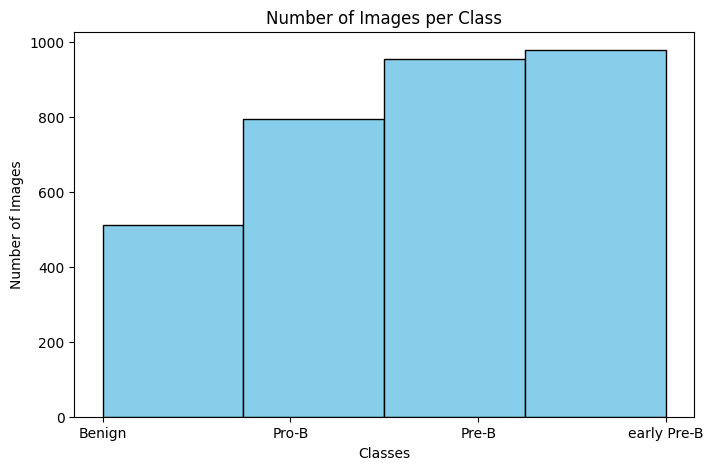

In [ ]:
import matplotlib.pyplot as plt

categories_len = len(np.unique(labels))

plt.figure(figsize=(8,5))

plt.hist(labels, bins=categories_len, color='skyblue', edgecolor='black')
plt.title("Number of Images per Class")
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.show()




C:\Users\alibo\AppData\Local\Temp\ipykernel_29528\577838447.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='classe', data=df, palette='viridis',


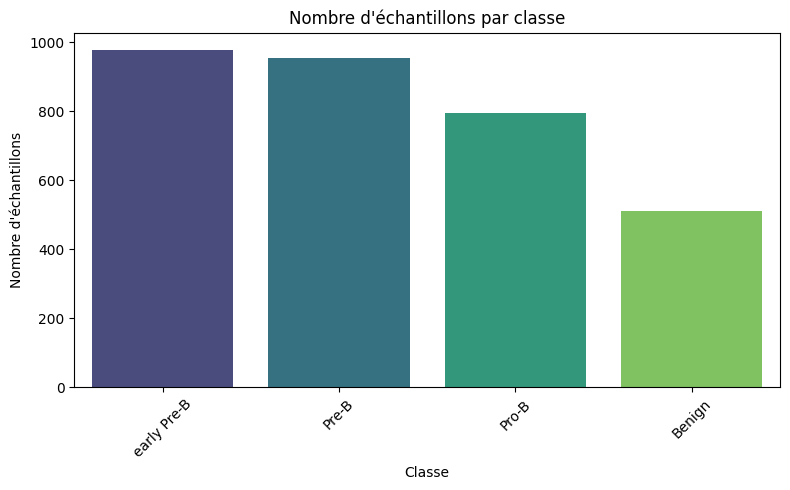

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


df = pd.DataFrame({'classe': labels})

plt.figure(figsize=(8,5))
sns.countplot(x='classe', data=df, palette='viridis',
              order=df['classe'].value_counts().index)  # optionnel: trier par fréquence
plt.title("Nombre d'échantillons par classe")
plt.xlabel("Classe")
plt.ylabel("Nombre d'échantillons")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:
from collections import Counter

# Count the occurrences of each label
label_counts = Counter(labels) # key value par (categori + total of it)

# categories= pd.value_counts(labels) 
categories= pd.Series(labels).value_counts()
print(categories)

print("#"*50)
total_samples = sum(label_counts.values())

for label, count in label_counts.items():
    percentage = (count / total_samples) * 100
    print(f"{label}: {percentage:.2f}%")



early Pre-B    979
Pre-B          955
Pro-B          796
Benign         512
Name: count, dtype: int64
##################################################
Benign: 15.79%
Pro-B: 24.55%
Pre-B: 29.46%
early Pre-B: 30.20%


---
### Echantillon d’images

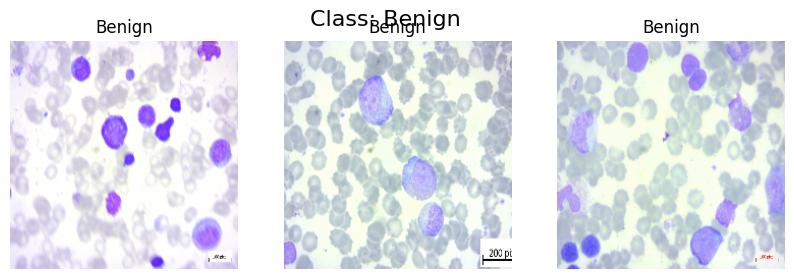

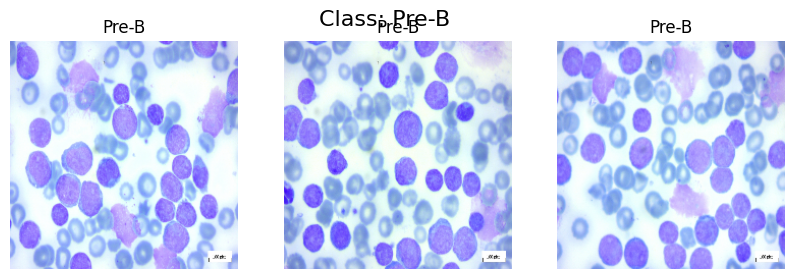

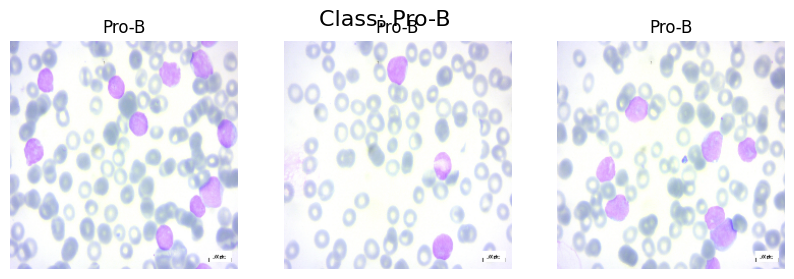

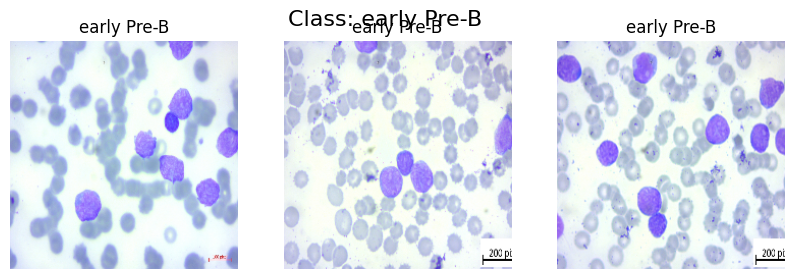

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# unique_classes -> list of all classes
unique_classes = np.unique(labels)

# Number of images per class to display
num_per_class = 3
labels = np.array(labels)  # ensure it's a NumPy array
labels = labels.flatten()  # now shape is (num_samples,)


for cls in unique_classes:
    # Find indices of images for this class
    cls_indices = np.where(labels == cls)[0]
    
    # Pick first 3 images (or random.sample if you want randomness)
    cls_indices = cls_indices[:num_per_class]
    
    plt.figure(figsize=(10,3))
    plt.suptitle(f"Class: {cls}", fontsize=16)
    
    for i, idx in enumerate(cls_indices):
        plt.subplot(1, num_per_class, i+1)
        plt.imshow(images[idx].squeeze(), cmap='gray')  # Better for medical images

        plt.title(str(cls))
        plt.axis('off')
    
    plt.show()
